In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gold = pd.read_csv('gld_price_data.csv')

In [3]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold.shape

(2290, 6)

In [5]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
numeric_gold = gold.select_dtypes(include=[np.number])


In [9]:
corr = numeric_gold.corr()

<Axes: >

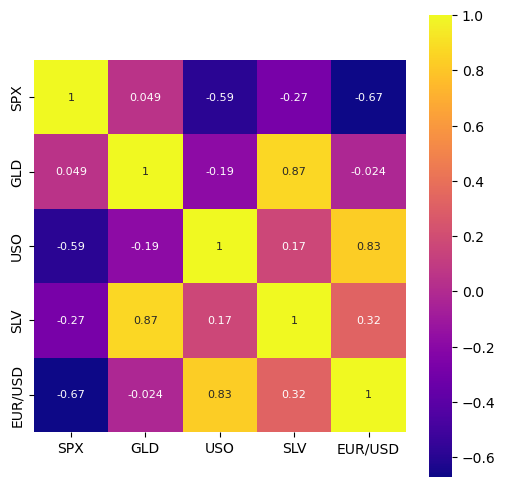

In [10]:
plt.figure(figsize = (6,6))
sns.heatmap(corr,cbar = True,annot = True, square = True, annot_kws = {'size':8}, cmap = 'plasma')

In [11]:
print(corr.GLD)

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Khadija's PC\AppData\Local\Temp\ipykernel_1460\4252131423.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_gold['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

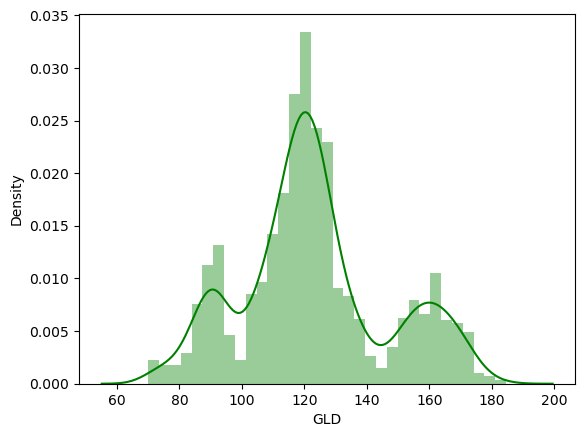

In [12]:
#checking the distribution of the gold
sns.distplot(numeric_gold['GLD'], color = 'green')

# SPLITTING THE FEATURES AND TARGETS

In [13]:
x = gold.drop(['Date','GLD'],axis = 1)
y = gold.GLD

In [14]:
y 

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
reg = RandomForestRegressor()

In [19]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [20]:
y_pred = reg.predict(x_test)

In [21]:
r2_score(y_test,y_pred)

0.9893325705862328

In [22]:
print(y_pred)

[168.66269957  81.86759989 115.90160044 127.68230075 120.58190128
 154.62959835 150.57279943 126.24569979 117.43309867 125.86860087
 116.98320073 171.33880127 141.18279778 168.01699856 115.15390007
 117.47790029 140.1485036  170.26360096 159.52330256 158.97699998
 155.01199992 125.34540027 175.3387002  157.24040241 125.05230039
  93.75759973  77.47470001 120.51710017 119.12419965 167.57000055
  88.16050044 125.32489991  91.22670103 117.6747004  121.21789915
 136.11840095 115.45260121 115.11130047 146.80559947 107.38990073
 104.48590268  87.12669779 126.48280059 117.98410037 154.19209919
 119.65049999 108.3527999  108.02309792  93.09780032 126.97299826
  74.79969989 113.57769954 121.4476002  111.22099906 118.81859889
 120.87429928 160.02899986 167.68950132 147.0466974   85.86479876
  94.40900052  86.91889886  90.5771997  118.87700098 126.44880063
 127.58380028 169.13110025 122.2951995  117.40109888  98.58100018
 168.6206027  143.13679788 131.52200246 121.32710218 121.14829903
 119.78690

In [23]:
import pickle
pickle.dump(reg,open('Gold_model.pkl','wb'))

In [24]:
reg = pickle.load(open('Gold_model.pkl','rb'))